In [1]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
real = pd.read_csv('VSI_test3_real_charge.csv',sep=';', header=None)
real.head(100)

,0,1,2,3,4,5,6,7
0,09.05.2025 21:00:00,09.05.2025 21:00:30,0,"24,647014617919922","51,469997406005859","45,973381042480469","41,369968414306641",NaN
1,09.05.2025 21:00:30,09.05.2025 21:01:00,0,"24,699857711791992","51,469997406005859","45,9732551574707","41,367183685302734",NaN
2,09.05.2025 21:01:00,09.05.2025 21:01:30,0,"24,700000762939453","51,4652099609375","45,973339080810547","41,366180419921875",NaN
3,09.05.2025 21:01:30,09.05.2025 21:02:00,0,"24,685970306396484","51,463336944580078","45,970504760742187","41,363319396972656",NaN
4,09.05.2025 21:02:00,09.05.2025 21:02:30,0,"24,614536285400391","51,456707000732422","45,969490051269531","41,360546112060547",NaN
...,...,...,...,...,...,...,...,...
95,09.05.2025 21:47:30,09.05.2025 21:48:00,0,"24,1507625579834","51,350002288818359","45,9632682800293","41,31689453125",NaN
96,09.05.2025 21:48:00,09.05.2025 21:48:30,0,"24,149248123168945","51,349998474121094","45,956703186035156","41,306591033935547",NaN
97,09.05.2025 21:48:30,09.05.2025 21:49:00,0,"24,166093826293945","51,363422393798828","45,958454132080078","41,306781768798828",NaN
98,09.05.2025 21:49:00,09.05.2025 21:49:30,0,"24,135047912597656","51,350009918212891","45,951572418212891","41,298442840576172",NaN


In [38]:
header = ['time','Q_flow','feed_real','up_real','mid_real','low_real']
real_clean = real.iloc[:,1:7]
real_clean.columns = header
real_clean['time_only'] = pd.to_datetime(real_clean['time']).dt.time
real_clean.head()

,time,Q_flow,feed_real,up_real,mid_real,low_real,time_only
0,09.05.2025 21:00:30,0,"24,647014617919922","51,469997406005859","45,973381042480469","41,369968414306641",21:00:30
1,09.05.2025 21:01:00,0,"24,699857711791992","51,469997406005859","45,9732551574707","41,367183685302734",21:01:00
2,09.05.2025 21:01:30,0,"24,700000762939453","51,4652099609375","45,973339080810547","41,366180419921875",21:01:30
3,09.05.2025 21:02:00,0,"24,685970306396484","51,463336944580078","45,970504760742187","41,363319396972656",21:02:00
4,09.05.2025 21:02:30,0,"24,614536285400391","51,456707000732422","45,969490051269531","41,360546112060547",21:02:30


In [39]:
# Replace ',' with '.' and convert columns to float
header_conv = header[1:]
for col in header_conv:
    real_clean[col] = real_clean[col].astype(str).str.replace(',', '.', regex=False)
    real_clean[col] = pd.to_numeric(real_clean[col], errors='coerce') 
real_clean.head()

,time,Q_flow,feed_real,up_real,mid_real,low_real,time_only
0,09.05.2025 21:00:30,0.0,24.647015,51.469997,45.973381,41.369968,21:00:30
1,09.05.2025 21:01:00,0.0,24.699858,51.469997,45.973255,41.367184,21:01:00
2,09.05.2025 21:01:30,0.0,24.700001,51.465210,45.973339,41.366180,21:01:30
3,09.05.2025 21:02:00,0.0,24.685970,51.463337,45.970505,41.363319,21:02:00
4,09.05.2025 21:02:30,0.0,24.614536,51.456707,45.969490,41.360546,21:02:30


<Figure size 1500x1000 with 0 Axes>

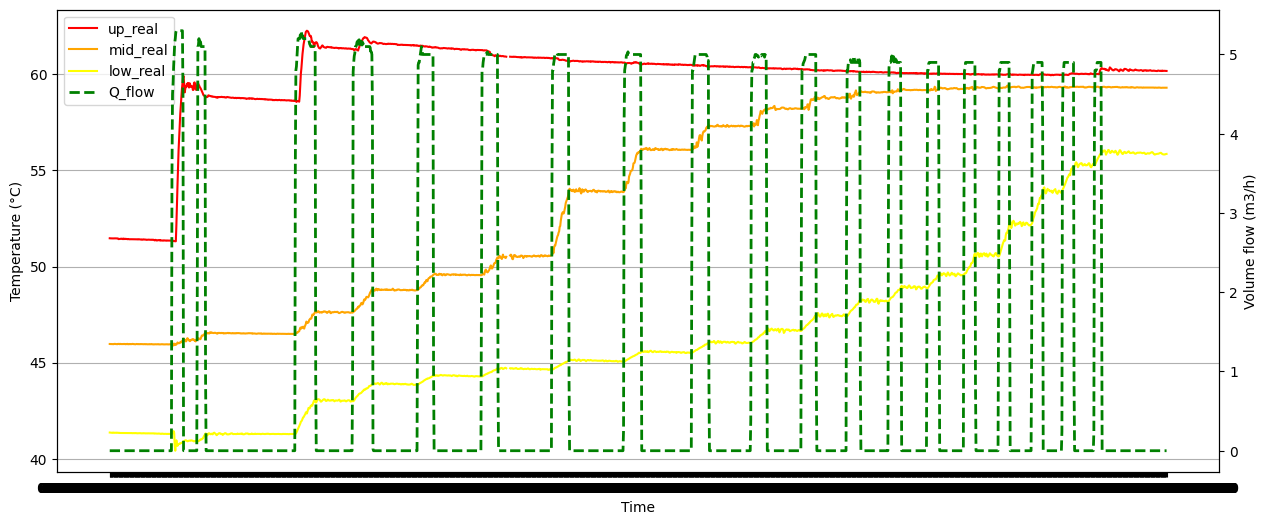

In [40]:
plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots(figsize=(15,6)) #main axis (left)
ax2 = ax1.twinx() #creating right axis

# Plotting temeprature using left axis
for col, color in zip(['up_real', 'mid_real', 'low_real'], ['red', 'orange', 'yellow']):
    ax1.plot(real_clean['time'], real_clean[col], label=col, color=color)

# Plotting volume flow using right axis
ax2.plot(real_clean['time'], real_clean['Q_flow'], label='Q_flow', color='green', linewidth=2, linestyle='--')

# Labels
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Volume flow (m3/h)")

# Joining legends from both axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Grade
ax1.grid(axis='y')

plt.show()

In [41]:
first_nonzero_index = real_clean.index[real_clean['Q_flow'] != 0][0]

# Obter o tempo correspondente
first_nonzero_time = real_clean.loc[first_nonzero_index, 'time']

print(f"start time: {first_nonzero_time}")

start time: 09.05.2025 21:57:00


Considering that the RL temperature is the same as the lower temperature, the lowest temperature sensor inside the VSI should be measuring the lowest layer

# Test 1 - 7 layers
 - V = 7000L
 - m_nominal (all valves) = 2 m3/h
 - dp_nominal = 1 bar (changing from 1e-5 to 1 didn't affect output temperatures)

In [42]:
sim = pd.read_csv('VSI_test3_sim.csv', sep = ',', header = None)
sim.head()

,0,1,2,3,4,5
0,Time,layeredStorage_Physical.localState.fUpperTempe...,layeredStorage_Physical.localState.fMidTempera...,layeredStorage_Physical.localState.fLowerTempe...,layeredStorage_Physical.feedTemperature,Q_feed.V_flow
1,0,324.6,319.15,314.45,337.5,0
2,115.2,324.6,319.15,314.45,337.5,0
3,230.4,324.6,319.15,314.45,337.5,0
4,345.6,324.6,319.15,314.45,337.5,0


In [43]:
def clean_sim (df):
    header_sim =['time','up_sim','mid_sim','low_sim','feed_sim','Q_flow_sim']
    header_sim_conv = header_sim[1:-1]
    sim_clean = df.iloc[1:]
    sim_clean.columns = header_sim
    for col in header_sim_conv:
        sim_clean[col] = pd.to_numeric(sim_clean[col], errors='coerce')
        sim_clean.loc[:, col] = sim_clean[col] - 273.15 #converting to °C
    sim_clean['time'] = pd.to_numeric(sim_clean['time'], errors='coerce')
    sim_clean['Q_flow_sim'] = pd.to_numeric(sim_clean['Q_flow_sim'], errors='coerce')
    return sim_clean

In [44]:
sim_clean = clean_sim(sim)
sim_clean.head()

C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean[col] = pd.to_numeric(sim_clean[col], errors='coerce')
C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean['time'] = pd.to_numeric(sim_clean['time'], errors='coerce')
C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,time,up_sim,mid_sim,low_sim,feed_sim,Q_flow_sim
1,0.0,51.45,46.0,41.3,64.35,0.0
2,115.2,51.45,46.0,41.3,64.35,0.0
3,230.4,51.45,46.0,41.3,64.35,0.0
4,345.6,51.45,46.0,41.3,64.35,0.0
5,460.8,51.45,46.0,41.3,64.35,0.0


<Figure size 1500x1000 with 0 Axes>

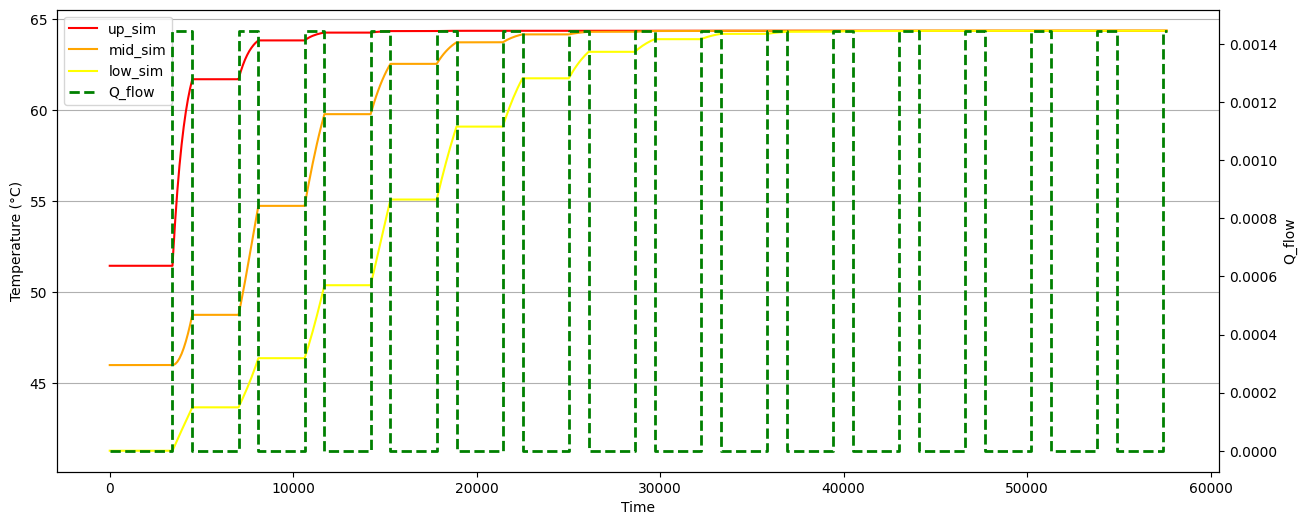

In [45]:
plt.figure(figsize=(15,10))
fig, ax1 = plt.subplots(figsize=(15,6)) #main axis (left)
ax2 = ax1.twinx() #creating right axis

# Plotting temeprature using left axis
for col, color in zip(['up_sim', 'mid_sim', 'low_sim'], ['red', 'orange', 'yellow']):
    ax1.plot(sim_clean['time'], sim_clean[col], label=col, color=color)

# Plotting volume flow using right axis
ax2.plot(sim_clean['time'], sim_clean['Q_flow_sim'], label='Q_flow', color='green', linewidth=2, linestyle='--')

# Labels
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Q_flow")
# Joining legends from both axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Grade
ax1.grid(axis='y')

plt.show()

In [46]:
#COMPARING REAL DATA WITH SIMULATION RESULTS
# Step 1: Get the index of the max feed temperature value in the first period
initial_temp = real_clean['feed_real'].iloc[:100].idxmax()
real_comp = real_clean.iloc[:,:9]
# Step 2: Keep rows from that index onward
real_comp = real_comp.loc[initial_temp:].reset_index(drop=True)
real_comp['time'] = real_comp.index * 30
real_comp.head()

,time,Q_flow,feed_real,up_real,mid_real,low_real,time_only
0,0,0.0,24.700001,51.465210,45.973339,41.366180,21:01:30
1,30,0.0,24.685970,51.463337,45.970505,41.363319,21:02:00
2,60,0.0,24.614536,51.456707,45.969490,41.360546,21:02:30
3,90,0.0,24.699940,51.464695,45.973156,41.352737,21:03:00
4,120,0.0,24.700001,51.461903,45.966869,41.369938,21:03:30


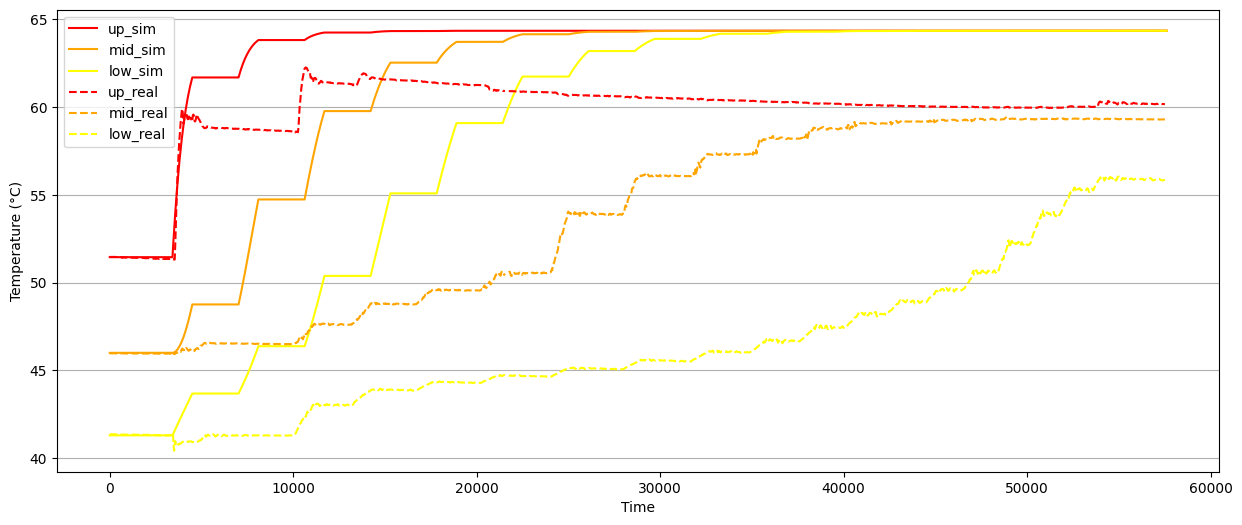

In [47]:
plt.figure(figsize=(15,6))
for col, color in zip(['up_sim', 'mid_sim', 'low_sim'], ['red', 'orange', 'yellow']):
    plt.plot(sim_clean['time'], sim_clean[col], label=col, color=color)
for col, color, linestyle in zip(['up_real', 'mid_real', 'low_real'], ['red', 'orange', 'yellow'],['--', '--', '--', '--']):
    plt.plot(real_comp['time'], real_comp[col], label=col, color=color, linestyle=linestyle)
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.legend()
plt.grid(axis = 'y')
plt.show()

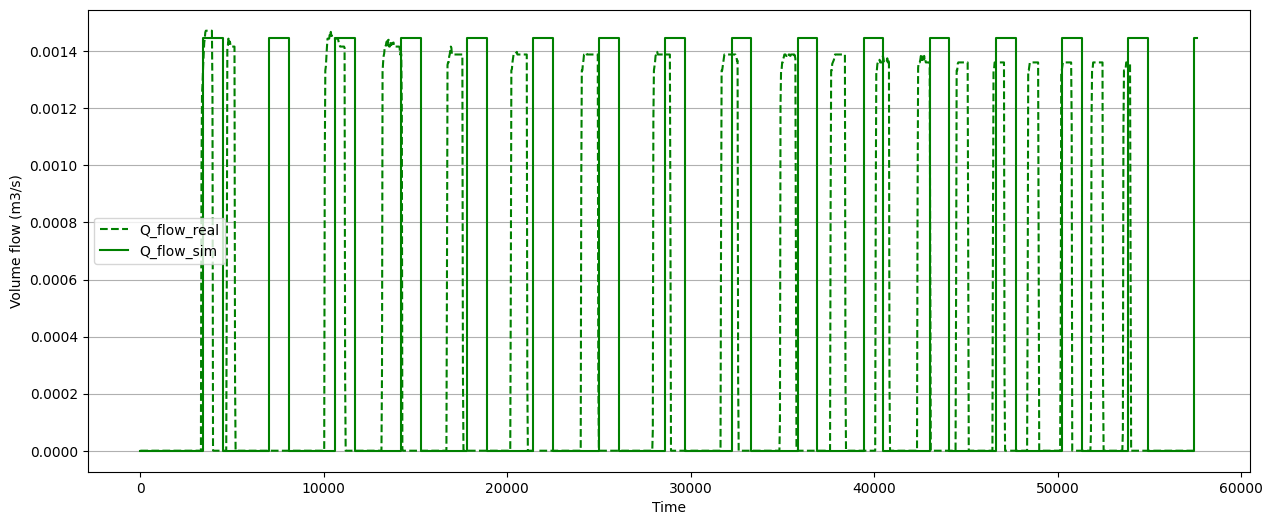

In [49]:
fig, ax1 = plt.subplots(figsize=(15,6)) 
real_comp['Q_flow'] = real_comp['Q_flow']/3600
plt.plot(real_comp['time'], real_comp['Q_flow'], label='Q_flow_real', color='green', linestyle='--')
plt.plot(sim_clean['time'], sim_clean['Q_flow_sim'], label='Q_flow_sim', color='green')
plt.ylabel("Volume flow (m3/s)")
plt.xlabel("Time")
plt.legend()
plt.grid(axis = 'y')
plt.show()

# Testing with 5 layers

In [54]:
sim2 = pd.read_csv('VSI_test3_sim_5layers.csv', sep = ',', header = None)
sim_clean2 = clean_sim(sim2)
sim_clean2.head()

C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean[col] = pd.to_numeric(sim_clean[col], errors='coerce')
C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean['time'] = pd.to_numeric(sim_clean['time'], errors='coerce')
C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_4892\3239458923.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,time,up_sim,mid_sim,low_sim,feed_sim,Q_flow_sim
1,0.0,51.5,46.0,41.3,64.35,0.0
2,115.2,51.5,46.0,41.3,64.35,0.0
3,230.4,51.5,46.0,41.3,64.35,0.0
4,345.6,51.5,46.0,41.3,64.35,0.0
5,460.8,51.5,46.0,41.3,64.35,0.0


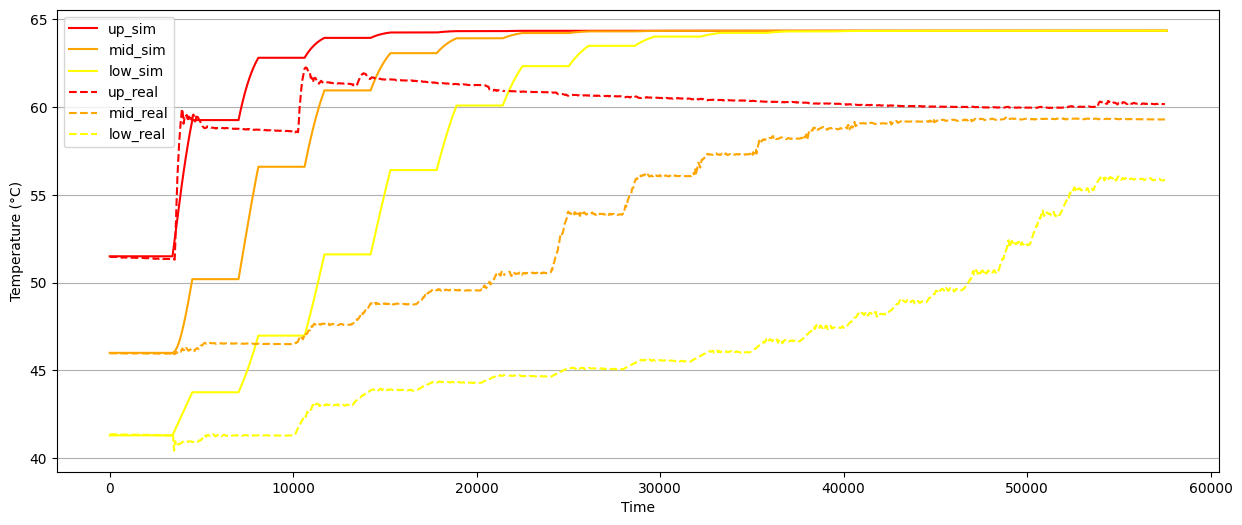

In [55]:
plt.figure(figsize=(15,6))
for col, color in zip([ 'up_sim', 'mid_sim', 'low_sim'], ['red', 'orange', 'yellow']):
    plt.plot(sim_clean2['time'], sim_clean2[col], label=col, color=color)
for col, color, linestyle in zip(['up_real', 'mid_real', 'low_real'], ['red', 'orange', 'yellow'],['--', '--', '--', '--']):
    plt.plot(real_comp['time'], real_comp[col], label=col, color=color, linestyle=linestyle)
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.legend()
plt.grid(axis = 'y')
plt.show()